# Using Vision with Tools

In this recipe, we'll demonstrate how to combine Vision with tool use to analyze an image of a nutrition label and extract structured nutrition information using a custom tool.

## Setup
First, let's install the necessary libraries and set up the Anthropic API client:

In [ ]:
%pip install anthropic IPython

In [2]:
from IPython.display import Image
from anthropic import Anthropic
import base64

client = Anthropic()
MODEL_NAME = "claude-3-opus-20240229"

# Defining the Nutrition Label Extraction Tool
Next, we'll define a custom tool called "print_nutrition_info" that extracts structured nutrition information from an image. The tool has properties for calories, total fat, cholesterol, total carbs, and protein:

In [3]:
nutrition_tool = {
    "name": "print_nutrition_info",
    "description": "Extracts nutrition information from an image of a nutrition label",
    "input_schema": {
        "type": "object",
        "properties": {
            "calories": {"type": "integer", "description": "The number of calories per serving"},
            "total_fat": {"type": "integer", "description": "The amount of total fat in grams per serving"},
            "cholesterol": {"type": "integer", "description": "The amount of cholesterol in milligrams per serving"},
            "total_carbs": {"type": "integer", "description": "The amount of total carbohydrates in grams per serving"},
            "protein": {"type": "integer", "description": "The amount of protein in grams per serving"}
        },
        "required": ["calories", "total_fat", "cholesterol", "total_carbs", "protein"]
    }
}

## Analyzing the Nutrition Label Image
Now, let's put it all together. We'll load a nutrition label image, pass it to Claude along with a prompt, and have Claude call the "print_nutrition_info" tool to extract the structured nutrition information into a nicely formatted JSON object:

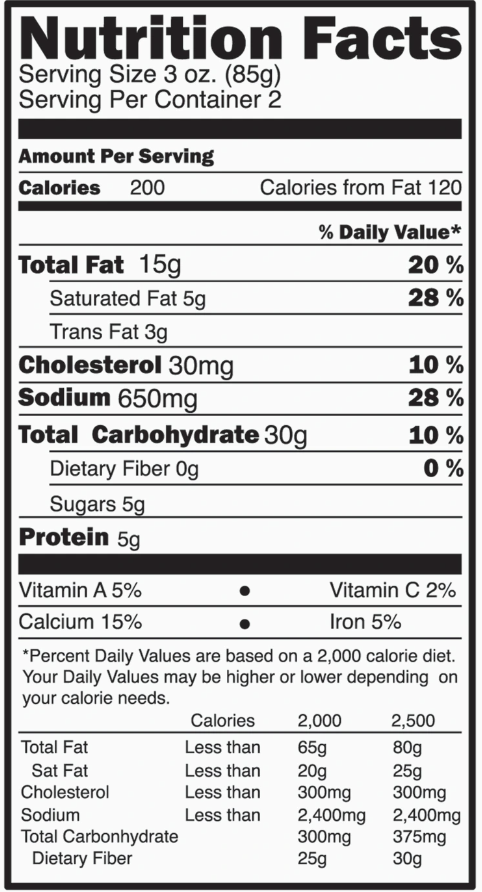

In [5]:
Image(filename='../images/tool_use/nutrition_label.png') 

In [11]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

message_list = [
    {
        "role": "user",
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("../images/tool_use/nutrition_label.png")}},
            {"type": "text", "text": "Please print the nutrition information from this nutrition label image."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=4096,
    messages=message_list,
    tools=[nutrition_tool]
)

if response.stop_reason == "tool_use":
    last_content_block = response.content[-1]
    if last_content_block.type == 'tool_use':
        tool_name = last_content_block.name
        tool_inputs = last_content_block.input
        print(f"=======Claude Wants To Call The {tool_name} Tool=======")
        print(tool_inputs)
            
else:
    print("No tool was called. This shouldn't happen!")
    

=======Claude Wants To Call The print_nutrition_info Tool=======
{'calories': 200, 'total_fat': 15, 'cholesterol': 30, 'total_carbs': 30, 'protein': 5}
